# 4.5 Testes estatísticos - t test

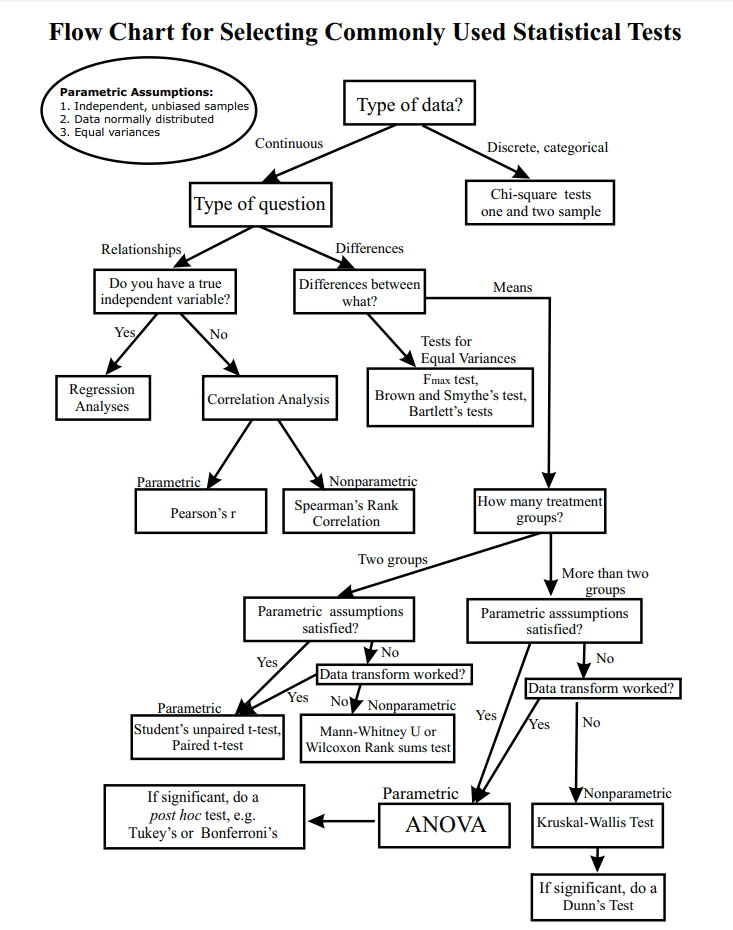

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st

In [2]:
# Capturando os dados para a análise

def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

ipca = consulta_bc(433) # índice nacional de preços ao consumidor-amplo IBGE

In [3]:
ipca.loc["2019"].mean()

valor    0.3525
dtype: float64

In [7]:
ipca.loc["2021"].mean()

valor    0.8025
dtype: float64

# O test t

- A estatística de teste é comparada com um valor crítico mais baixo, e se for menor que este limite, a hipótese nula é rejeitada. Assim, um teste estatístico requer um par de hipóteses; nomeadamente,

-	H0: uma hipótese nula
-	Ha: uma hipótese alternativa.


No nosso caso H0 é que os valores médios do IPCA são significativamente semelhantes

In [6]:
st.ttest_ind(a = ipca.loc["2019"], b = ipca.loc["2021"], equal_var = False)

Ttest_indResult(statistic=array([-3.35845126]), pvalue=array([0.00288914]))

O valor de p obtido pelo teste t não é significativo (p > 0,05) e, portanto, concluímos que os valores do IPCA de 2019  são significativamente semelhantes dos valores do IPAC de 2020